In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading Train Dataset

In [2]:
df_train = pd.read_csv('blackFriday_train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df_train.shape

(550068, 12)

### Loading Test Dataset

In [4]:
df_test = pd.read_csv('blackFriday_test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
df_test.shape

(233599, 11)

### Merging Train and Test Dataset

In [6]:
df = df_train.append(df_test, sort=False)
df.shape

(783667, 12)

In [7]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


## Describing the basic statistics of Datasets

In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
df.drop(['User_ID'], axis = 1, inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


### Converting categorical variables into numerical

In [10]:
df['Gender'] = df['Gender'].map({'F':0, 'M':1})
df['Gender'].head(10)

0    0
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    1
9    1
Name: Gender, dtype: int64

### Visualizing the unique values of the Age field

In [11]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
df['Age'] = df['Age'].map({'0-17': 0, '55+' : 1, '26-35': 2, '46-50':3, '51-55':4, '36-45':5,'18-25':6})

In [13]:
df['Age'].head(10)

0    0
1    0
2    0
3    0
4    1
5    2
6    3
7    3
8    3
9    2
Name: Age, dtype: int64

### Visualizing the unique values of the City_Category field

In [14]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [15]:
city = pd.get_dummies(df['City_Category'], drop_first=True)
city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


In [16]:
df = pd.concat([df, city], axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,1,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [17]:
df.drop(['City_Category'], axis=1, inplace=True)
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,1,16,4+,0,8,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,P00118942,0,2,15,4+,1,8,NaN,NaN,NaN,1,0
233595,P00254642,0,2,15,4+,1,5,8.0,NaN,NaN,1,0
233596,P00031842,0,2,15,4+,1,1,5.0,12.0,NaN,1,0
233597,P00124742,0,3,1,4+,0,10,16.0,NaN,NaN,0,1


### Checking for columnwise null values

In [18]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

### Visualizing unique values of fields whicn contains NAN values for different columns

In [19]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [20]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [21]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

### Value count for each variable

In [22]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

### Finding Mode of the fields

In [23]:
df['Product_Category_1'].mode()

0    5
dtype: int64

### Renaming the columns

In [24]:
df.rename(columns={'Product_Category_1': 'cat_1', 'Product_Category_2': 'cat_2', 'Product_Category_3': 'cat_3'}, inplace = True)

In [25]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'cat_1', 'cat_2',
       'cat_3', 'Purchase', 'B', 'C'],
      dtype='object')

### Filling the nan values with mode

In [26]:
df['cat_2'].mode()

0    8.0
dtype: float64

In [27]:
df['cat_2'] = df['cat_2'].fillna(df['cat_2'].mode()[0])

In [28]:
df['cat_2'].isnull().sum()

0

In [29]:
df['cat_3'].mode()[0]

16.0

In [30]:
df['cat_3'].isnull().sum()

545809

In [31]:
df['cat_3'] = df['cat_3'].fillna(df['cat_3'].mode()[0])

In [32]:
df['cat_3'].isnull().sum()

0

In [33]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
cat_1                              0
cat_2                              0
cat_3                              0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

### Filling NAN values of purchase column with mean

In [34]:
df['Purchase'].mean()

9263.968712959126

In [35]:
df['Purchase'] = df['Purchase'].fillna(df['Purchase'].mean())

In [36]:
df['Purchase'].isnull().sum()

0

In [37]:
df.tail()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat_1,cat_2,cat_3,Purchase,B,C
233594,P00118942,0,2,15,4+,1,8,8.0,16.0,9263.968713,1,0
233595,P00254642,0,2,15,4+,1,5,8.0,16.0,9263.968713,1,0
233596,P00031842,0,2,15,4+,1,1,5.0,12.0,9263.968713,1,0
233597,P00124742,0,3,1,4+,0,10,16.0,16.0,9263.968713,0,1
233598,P00316642,0,3,0,4+,1,4,5.0,16.0,9263.968713,1,0


In [38]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [39]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','') # replacing with blank

In [40]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [41]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat_1,cat_2,cat_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,1,16,4,0,8,8.0,16.0,7969.0,0,1


### Checking the allover info of the dataset 

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Product_ID                    783667 non-null object
Gender                        783667 non-null int64
Age                           783667 non-null int64
Occupation                    783667 non-null int64
Stay_In_Current_City_Years    783667 non-null object
Marital_Status                783667 non-null int64
cat_1                         783667 non-null int64
cat_2                         783667 non-null float64
cat_3                         783667 non-null float64
Purchase                      783667 non-null float64
B                             783667 non-null uint8
C                             783667 non-null uint8
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


In [43]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Product_ID                    783667 non-null object
Gender                        783667 non-null int64
Age                           783667 non-null int64
Occupation                    783667 non-null int64
Stay_In_Current_City_Years    783667 non-null int32
Marital_Status                783667 non-null int64
cat_1                         783667 non-null int64
cat_2                         783667 non-null float64
cat_3                         783667 non-null float64
Purchase                      783667 non-null float64
B                             783667 non-null int32
C                             783667 non-null int32
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


In [46]:
df.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
cat_1                           int64
cat_2                         float64
cat_3                         float64
Purchase                      float64
B                               int32
C                               int32
dtype: object

### Creating a checkpoint

In [47]:
df_i = df.copy()

In [48]:
df_i.drop('Product_ID', axis = 1, inplace=True)

In [49]:
df_i.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,cat_1,cat_2,cat_3,Purchase,B,C
0,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,1,16,4,0,8,8.0,16.0,7969.0,0,1


# Visualization

### Age vs Purchase

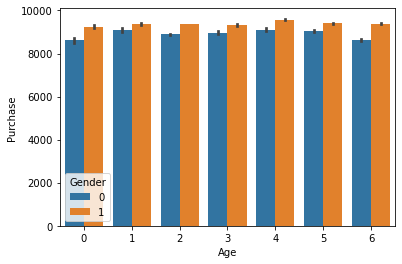

In [50]:
sns.barplot('Age', 'Purchase', hue='Gender', data=df_i)

Purchasing of goods of each range of age are almost equal. We can conclude that the percentage of purchasing goods of men over women in higher 

### Occupation Vs Purchase

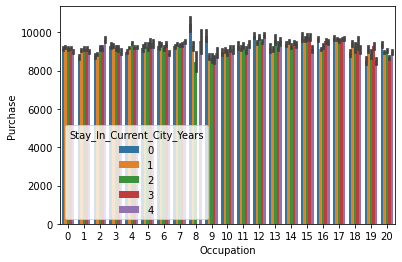

In [51]:
sns.barplot('Occupation', 'Purchase', hue='Stay_In_Current_City_Years', data = df_i)

### Product_Category_1 vs Purchased

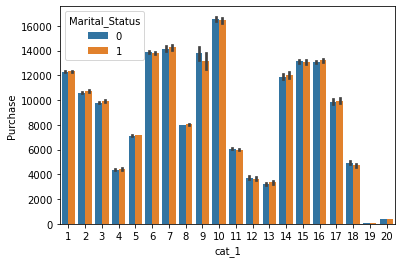

In [52]:
sns.barplot('cat_1', 'Purchase', hue='Marital_Status', data=df_i)

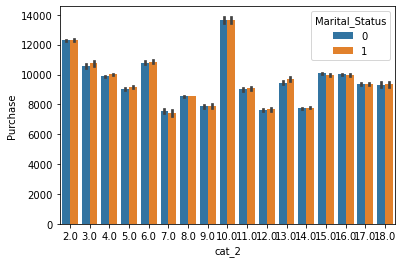

In [53]:
sns.barplot('cat_2', 'Purchase', hue='Marital_Status', data=df_i)

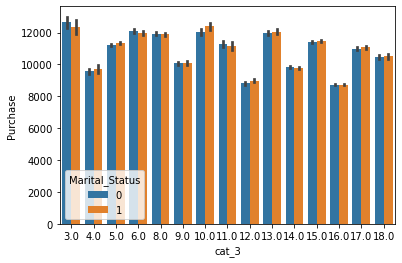

In [54]:
sns.barplot('cat_3', 'Purchase', hue='Marital_Status', data=df_i)

One thing we can clearly conclude is that there is no such variation in the percentage of the purchasing whether the person is married or not. Product category 3 is much more purchased by people than the product category 1 and Product catgory 2 

In [55]:
X = df_i.drop('Purchase', axis = 1) 
y = df_i.Purchase

print(X.shape)
print(y.shape)

(783667, 10)
(783667,)


In [57]:
# splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=5)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(587750, 10)
(587750,)
(195917, 10)
(195917,)


### Feature Scaling

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [60]:
X_train

array([[ 0.57275431, -0.82655458,  0.6008837 , ...,  0.36937114,
         1.17365495, -0.67228678],
       [ 0.57275431, -0.82655458, -1.23913919, ...,  0.36937114,
        -0.85203918, -0.67228678],
       [ 0.57275431, -0.25822711, -0.16579251, ...,  0.36937114,
         1.17365495, -0.67228678],
       ...,
       [ 0.57275431,  0.31010035,  1.67423038, ...,  0.36937114,
        -0.85203918,  1.48746045],
       [ 0.57275431,  1.44675528, -0.93246871, ...,  0.36937114,
        -0.85203918, -0.67228678],
       [ 0.57275431, -0.82655458, -1.23913919, ...,  0.36937114,
        -0.85203918,  1.48746045]])

In [61]:
X_test

array([[ 0.57321472, -0.82699222, -0.62439925, ...,  0.36757968,
        -0.85307638, -0.67023792],
       [-1.74454698,  1.44874716, -0.62439925, ...,  0.36757968,
         1.17222797, -0.67023792],
       [ 0.57321472,  1.44874716, -0.62439925, ...,  0.36757968,
        -0.85307638, -0.67023792],
       ...,
       [ 0.57321472,  1.44874716,  0.9084425 , ..., -3.65618292,
         1.17222797, -0.67023792],
       [ 0.57321472,  1.44874716,  0.2953058 , ...,  0.36757968,
        -0.85307638,  1.4920075 ],
       [-1.74454698, -0.25805737,  0.60187415, ...,  0.36757968,
        -0.85307638,  1.4920075 ]])